In [85]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
from sklearn.preprocessing import LabelEncoder

In [90]:
df = pd.read_csv("Social_Network_Ads.csv")

In [91]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [92]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [93]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [94]:
correlation = df.corr()

In [95]:
correlation

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


<AxesSubplot:>

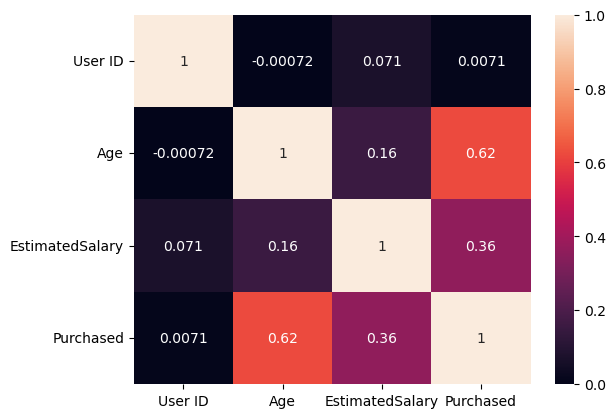

In [96]:
sns.heatmap(correlation, annot=True)

In [97]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [98]:
df.shape

(400, 5)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [100]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [101]:
df = df.drop('User ID', axis=1)

In [102]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [103]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [104]:
gender = LabelEncoder()

In [105]:
df['Gender'] = gender.fit_transform(df['Gender'])

In [106]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


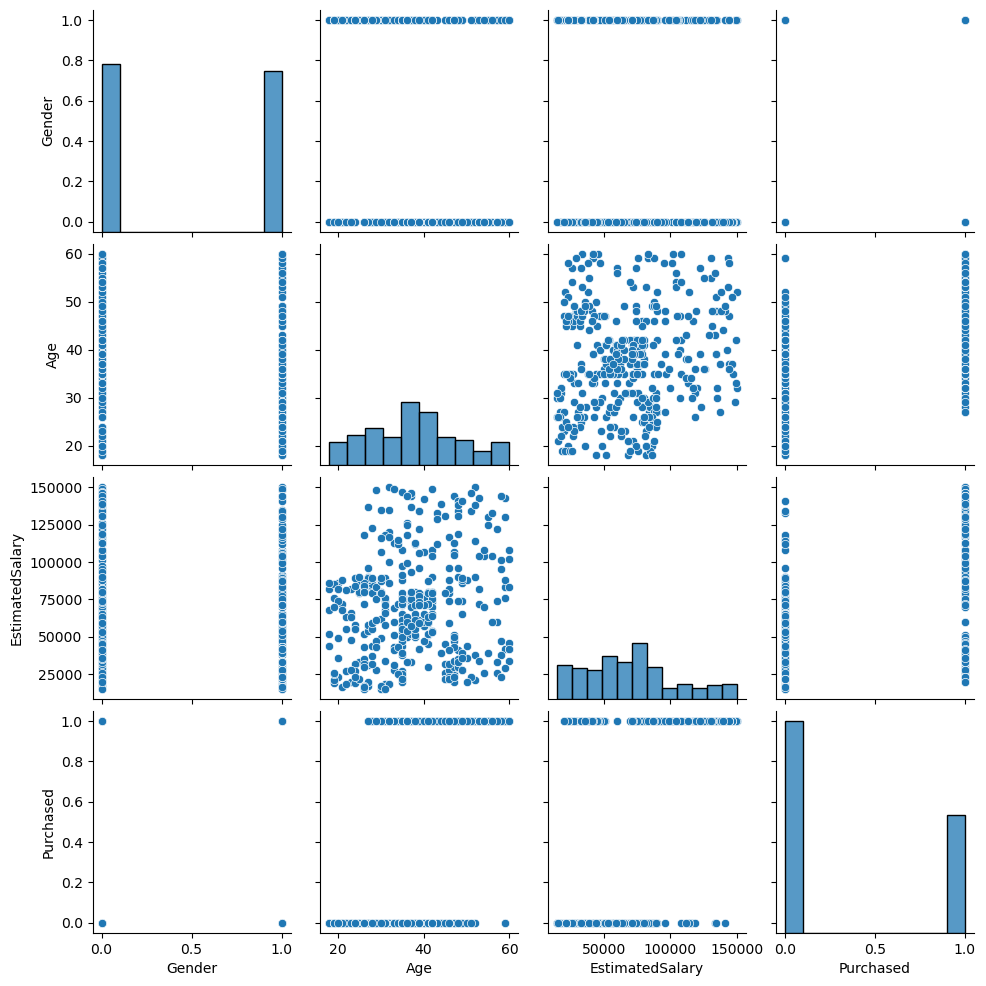

In [107]:
sns.pairplot(df)

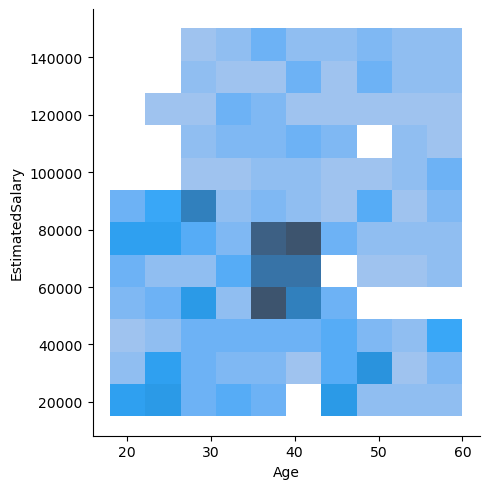

In [108]:
sns.displot(x=df.Age, y=df.EstimatedSalary)

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


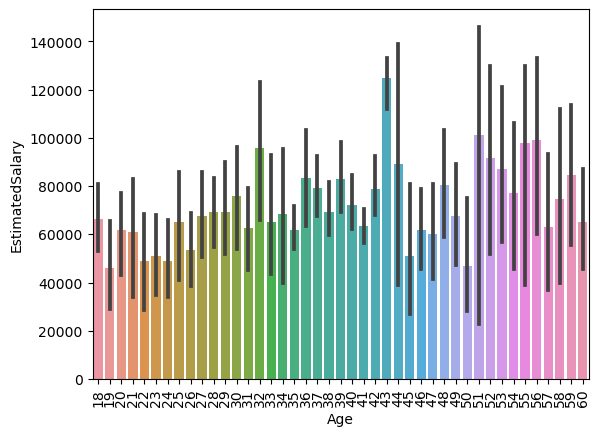

In [109]:
sns.barplot(df.Age, df.EstimatedSalary)
plt.xticks(rotation=90)
plt.show()

In [110]:
Age = df.groupby(by='Age')['Age', 'EstimatedSalary']

C:\Users\david\AppData\Local\Temp\ipykernel_7248\1783403175.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Age = df.groupby(by='Age')['Age', 'EstimatedSalary']


In [111]:
len(Age.head().Age.unique())

43

In [112]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [113]:
Independent_var = df.drop(['Purchased'], axis = 1)
Dependent_var = df.drop(['Age','EstimatedSalary','Gender'], axis=1)

In [114]:
Independent_var

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [115]:
Dependent_var

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [116]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Independent_var, Dependent_var, test_size = 0.20, random_state = 42)

In [118]:
print(X_train,y_train)

     Gender  Age  EstimatedSalary
3         0   27            57000
18        1   46            28000
202       0   39           134000
250       0   44            39000
274       0   57            26000
..      ...  ...              ...
71        0   24            27000
106       0   26            35000
270       0   43           133000
348       1   39            77000
102       0   32            86000

[320 rows x 3 columns]      Purchased
3            0
18           1
202          1
250          0
274          1
..         ...
71           0
106          0
270          0
348          0
102          0

[320 rows x 1 columns]


In [119]:
    print(X_test,y_test)

     Gender  Age  EstimatedSalary
209       0   46            22000
280       0   59            88000
33        0   28            44000
210       0   48            96000
93        0   29            28000
..      ...  ...              ...
246       0   35            50000
227       1   56           133000
369       0   54            26000
176       0   35            47000
289       0   37            78000

[80 rows x 3 columns]      Purchased
209          0
280          1
33           0
210          1
93           0
..         ...
246          0
227          1
369          1
176          0
289          1

[80 rows x 1 columns]


In [121]:
models = {
    'Random Forest' : {
        'Model' : RandomForestClassifier(),
        'param':{
            'n_estimators' : [10, 50, 100, 130, 150],
            'criterion' : ['gini', 'entropy'],
            'max_depth' : range(2, 4, 1),
            'max_features' : ['auto', 'log2']
        }
    },
    'XGBOOSTER': {
        'Model' : xgboost.XGBClassifier(),
        'param':{
            'learning_rate' : [0.5, 0.1, 0.01, 0.001,0.8],
            'n_estimators' : [10, 50, 100, 200],
            'max_depth' : [3, 5, 10, 20]
        }
        
    },
    
    'Naive Bayes' :{
        'Model': MultinomialNB(),
        'param':{
            'alpha': [0.1, 0.01, 0.001, 0.0001],
            'fit_prior': [True, False]
        }
    },
    'GaussianNB':{
        'Model': GaussianNB(),
        'param':{
            'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2]],
            'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
        }
    }
}

In [122]:
models

{'Random Forest': {'Model': RandomForestClassifier(),
  'param': {'n_estimators': [10, 50, 100, 130, 150],
   'criterion': ['gini', 'entropy'],
   'max_depth': range(2, 4),
   'max_features': ['auto', 'log2']}},
 'XGBOOSTER': {'Model': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_sta

In [123]:
scores =[]
for model_name, mp in models.items():
    model_selection = GridSearchCV(estimator=mp['Model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(Independent_var, Dependent_var.values.ravel())
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [124]:
scores

[{'model': 'Random Forest',
  'best_score': 0.9099999999999999,
  'best_params': {'criterion': 'gini',
   'max_depth': 2,
   'max_features': 'log2',
   'n_estimators': 50}},
 {'model': 'XGBOOSTER',
  'best_score': 0.8775000000000001,
  'best_params': {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}},
 {'model': 'Naive Bayes',
  'best_score': 0.625,
  'best_params': {'alpha': 0.1, 'fit_prior': True}},
 {'model': 'GaussianNB',
  'best_score': 0.89,
  'best_params': {'priors': [0.5, 0.5], 'var_smoothing': 1e-08}}]

In [125]:
pd.DataFrame(scores)

,model,best_score,best_params
0,Random Forest,0.9100,"{'criterion': 'gini', 'max_depth': 2, 'max_fea..."
1,XGBOOSTER,0.8775,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est..."
2,Naive Bayes,0.6250,"{'alpha': 0.1, 'fit_prior': True}"
3,GaussianNB,0.8900,"{'priors': [0.5, 0.5], 'var_smoothing': 1e-08}"


# Gaussian Algorithm

In [134]:
social_Ads_classifier_GB = GaussianNB(priors=[0.5, 0.5], var_smoothing= 1e-08)

In [135]:
Y_train = y_train.values.ravel()
Y_train

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,

In [136]:
social_Ads_classifier_GB.fit(X_train, Y_train)

GaussianNB(priors=[0.5, 0.5], var_smoothing=1e-08)

In [137]:
Y_test = y_test.values.ravel()
social_Ads_classifier_GB.score(X_test, Y_test)

0.9125

In [138]:
social_Ads_classifier_GB.score(X_train, Y_train)

0.9

In [140]:
y_pred = social_Ads_classifier_GB.predict(X_test)
print(y_pred,y_test)

[1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0
 1 0 1 1 0 0]      Purchased
209          0
280          1
33           0
210          1
93           0
..         ...
246          0
227          1
369          1
176          0
289          1

[80 rows x 1 columns]


In [142]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93        52
           1       0.82      0.96      0.89        28

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



In [143]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

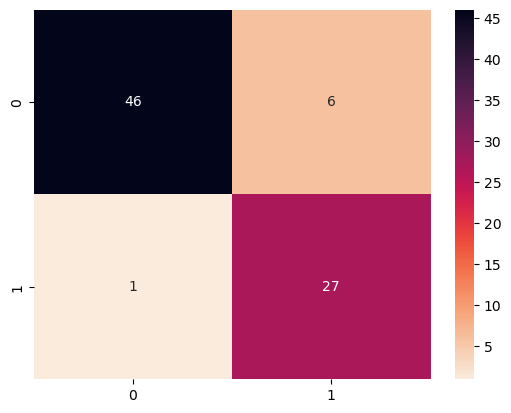

In [150]:
sns.heatmap(cm, annot=True, cmap='rocket_r')

# Random Forest

In [151]:
social_Ads_classifier_RF = RandomForestClassifier(criterion= 'gini', max_depth= 2, max_features= 'log2', n_estimators= 50)

In [155]:
social_Ads_classifier_RF.fit(X_train, Y_train)

RandomForestClassifier(max_depth=2, max_features='log2', n_estimators=50)

In [156]:
social_Ads_classifier_RF.score(X_test, Y_test)

0.9125

In [157]:
social_Ads_classifier_RF.score(X_train, Y_train)

0.9125

In [158]:
Y_pred = social_Ads_classifier_RF.predict(X_test)
print(Y_pred,y_test)

[1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0
 1 0 1 1 0 0]      Purchased
209          0
280          1
33           0
210          1
93           0
..         ...
246          0
227          1
369          1
176          0
289          1

[80 rows x 1 columns]


In [159]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        52
           1       0.86      0.89      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.91      0.90        80
weighted avg       0.91      0.91      0.91        80



In [160]:
cm_rf = confusion_matrix(y_test, Y_pred)
cm_rf

array([[48,  4],
       [ 3, 25]], dtype=int64)

<AxesSubplot:>

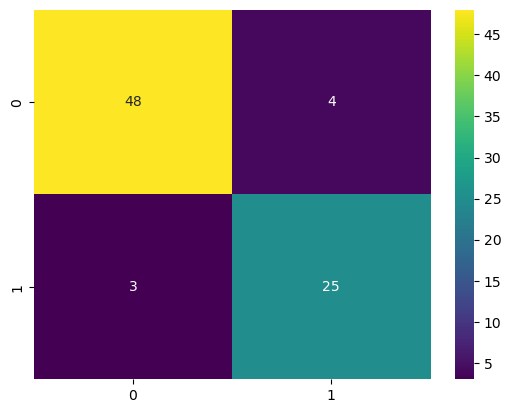

In [162]:
sns.heatmap(cm_rf, annot=True, cmap='viridis')

In our analysis, we have observed that Random Forest consistently produces superior results in predicting both classes, assigning equal importance to each class. Consequently, we have decided to leverage the Random Forest algorithm as a primary model for this dataset.

However, it is noteworthy that Gaussian Naive Bayes (NB) also yields balanced predictions for both classes, albeit with a nuanced approach. Unlike Random Forest, Gaussian NB tends to allocate relatively more support to the class that exhibits a higher prevalence within the dataset.

This strategic choice acknowledges the inherent characteristics of each algorithm and seeks to optimize predictive performance based on the unique attributes of the data at hand. The preference for Random Forest underscores its proficiency in achieving a balanced prediction outcome, while the consideration of Gaussian NB accounts for its adaptability to class imbalances within the dataset.

In [163]:
import pickle

In [164]:
with open('Models/social_Ads_classifier_RF.pickle', 'wb') as f:
    pickle.dump(social_Ads_classifier_RF, f)

In [167]:
with open('Models/social_Ads_gender_preprocessor.pickle', 'wb') as f:
    pickle.dump(gender, f)